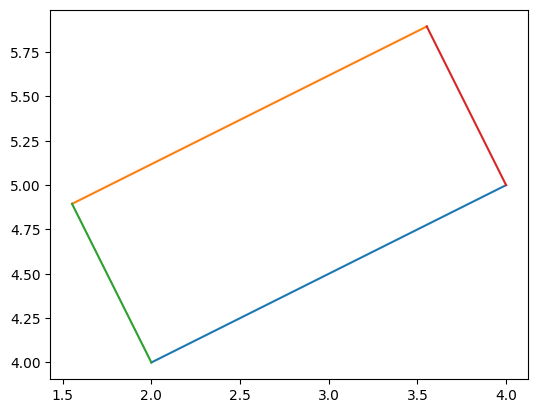

traget distance: 	 1 
length support a: 	 0.9999999999999998 
math dist a - res_a: 	 0.9999999999999999


In [1]:
%reload_ext autoreload
%autoreload 2
from fieldmapp.utils import calc_parallel_c
from shapely import LineString
import math
import matplotlib.pyplot as plt

a = (2,4)
b = (4,5)
distance = 1

res_a, res_b = calc_parallel_c(a, b, distance)

base = LineString([a, b])
parallel = LineString([res_a, res_b])
support_a = LineString([res_a, a])
support_b = LineString([res_b, b])

x,y =base.xy
plt.plot(x,y)
x,y = parallel.xy
plt.plot(x,y)
x,y = support_a.xy
plt.plot(x,y)
x,y = support_b.xy
plt.plot(x,y)
plt.gca().set_aspect('equal','box')
plt.show()

print(f"traget distance: \t {distance} \nlength support a: \t {support_a.length} \nmath dist a - res_a: \t {math.dist(a,res_a)}")
assert(round(support_a.length,5) == round(math.dist(a,res_a), 5))
assert(round(support_a.length,5) == round(distance, 5))



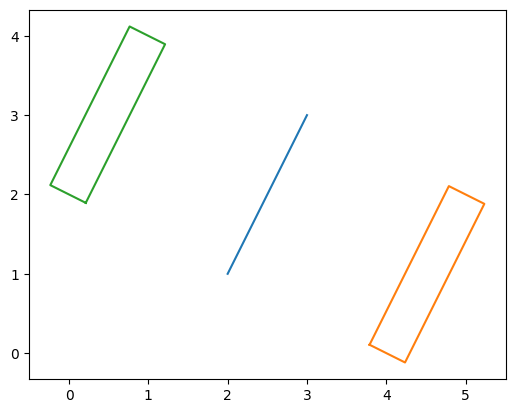

In [2]:
%reload_ext autoreload
%autoreload 2
from fieldmapp.utils import construct_parallel_polygon, calc_parallel_c
from shapely import LineString
import matplotlib.pyplot as plt

a = (2,1)
b = (3,3)
distance = -2

base = LineString([a, b])

p_a,p_b = calc_parallel_c(a, b, distance)
p2_a,p2_b = calc_parallel_c(a, b, -1*distance)

poly = construct_parallel_polygon(p_a,p_b,0.5)
poly_b = construct_parallel_polygon(p2_a,p2_b,-1*0.5)
x,y = base.xy
plt.plot(x,y)
x,y = poly.exterior.xy
plt.plot(x,y)
x,y = poly_b.exterior.xy
plt.plot(x,y)
plt.gca().set_aspect('equal','box')
plt.show()

GPST to UTC offset 18.0
TAI from GPST 2021-10-04 09:31:05.000
UTC corrected from GPST 2021-10-04 09:30:10.000
wrote file: ./output/drive_line_TEST_lanes.geosjon
wrote file: ./output/drive_point_TEST_lanes.geosjon
wrote file: ./output/drive_polygon_TEST_lanes.geosjon
wrote file: ./output/lane_line_TEST_lanes.geosjon
wrote file: ./output/lane_point_TEST_lanes.geosjon
wrote file: ./output/lane_polygon_TEST_lanes.geosjon


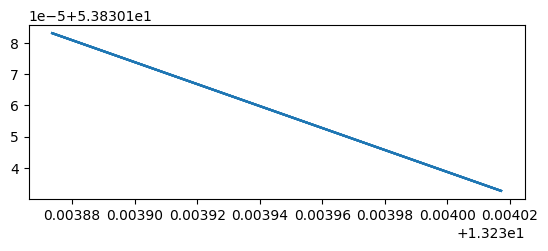

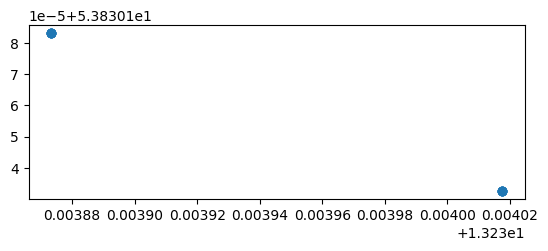

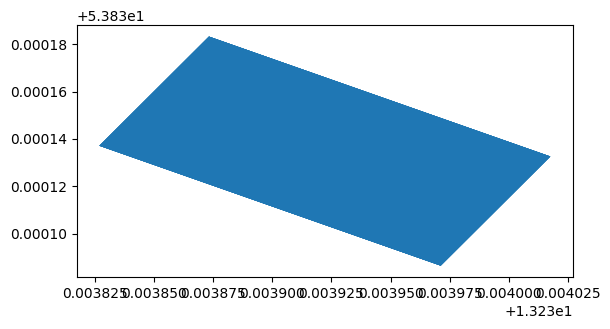

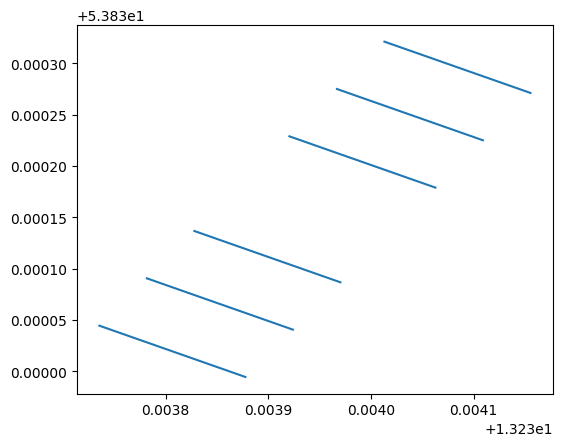

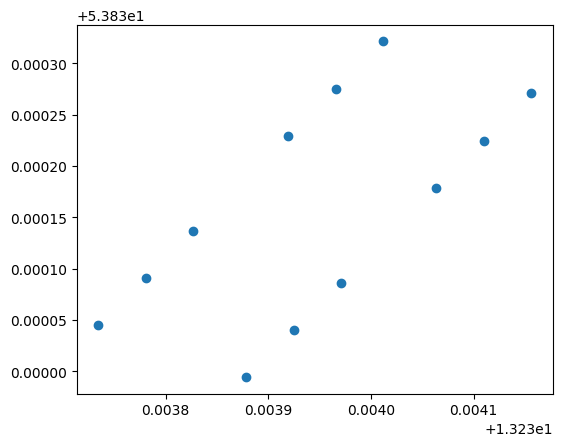

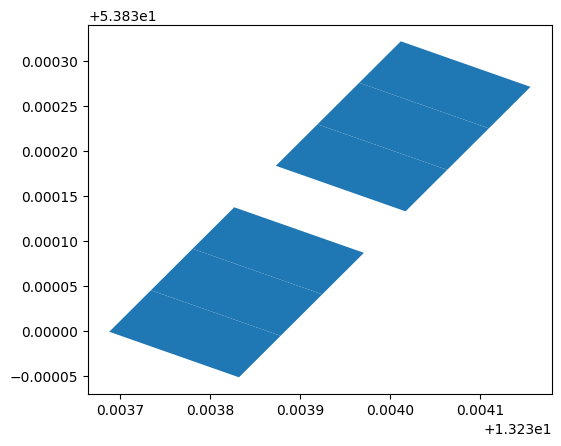

In [3]:
%reload_ext autoreload
%autoreload 2

import geopandas as gpd
from typing import List
from fieldmapp.run import run_dvp, DvpExecTypes



positions = "../data/ublox_complete.pos"
interactions = "../data/interaction_test-data.txt"
file_name = "TEST_lanes.geosjon"
out_dir = "./output"

_exec_l: List[DvpExecTypes] = [
           DvpExecTypes.DRIVE_LINE, 
           DvpExecTypes.DRIVE_POINT,
           DvpExecTypes.DRIVE_POLY, 
           DvpExecTypes.LANE_LINE, 
           DvpExecTypes.LANE_POINT, 
           DvpExecTypes.LANE_POLY ]

_lane_config = {
    1: 6,
    2: 12,
    3: 18,
    4: -6,
    5: -12,
    6: -18,
}
_lane_width = 6

run_dvp(
    interactions_file=interactions,
    positions_file=positions,
    base_epsg=4326,
    calc_epsg=3043,
    f_name=file_name,
    output_dir=out_dir,
    merge_col="UTC_Seconds",
    pos_time="GPST_Seconds",
    lane_config= _lane_config,
    lane_width= _lane_width,
    exec_list= _exec_l
)


%matplotlib inline

for e in _exec_l:
    df_places = gpd.read_file(f"{out_dir}/{e.value}_{file_name}")
    test = df_places['geometry']
    ax = test.plot()
    ax.set_aspect("equal", "box")

